# Problem 1.5

## Problem statement
Consider the wavefunction $$\Psi(x,t) = Ae^{-\lambda|x|}e^{i\omega t},$$ with $A$, $\lambda$, and $\omega$ positive real constants.

1. Normalize $\Psi$.
2. Find $\langle x\rangle$ and $\langle x^2\rangle$
3. Find $\sigma_x$. Also sketch $\Psi^2$ as a function of $x$, mark $\langle x \rangle + \sigma$ and $\langle x \rangle - \sigma$ to illustrate the "spread".  What is the probability of finding the particle inside this range?

----
## Solution

This problem is very similar to 1.3, but here we're given $\Psi$ instead of $\Psi^2$. Since $\Psi$ is complex, we need to take the complex conjugate to get $|\Psi^2|$ (which is what we integrate to do the normalization.)

In [2]:
import sympy as sp

# make output look nice
sp.init_printing()

# set up our symbols
lam, omega, A = sp.symbols('lambda omega A', positive=True, real=True)
x, t = sp.symbols('x t', real=True)

# define Psi...
Psi = A*sp.exp(-lam*sp.Abs(x))*sp.exp(sp.I*omega*t)

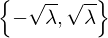

In [2]:
#...and |\Psi|^2
Psisq = Psi*sp.conjugate(Psi)

# our normalization condition is that the integral is equal to one
normalization_condition = sp.Eq(1, sp.integrate(Psisq, (x, -sp.oo, sp.oo)))

# and we can solve it for the normalization constant A.
sp.solveset(normalization_condition, A)

Note that we have two options here, one positive and one negative. In fact, any complex phase would work, but we specified that $A$ is real, so we only get the two options. It's customary to take the positive branch, but it doesn't really matter. We work the same magic that we did in problem 1.3 to apply the normalization. This particular method doesn't guarantee either the positive or the negative branch, but like I said, it doesn't really matter.

In [3]:
Psi = Psi.subs(A, next(iter(sp.solveset(normalization_condition, A))))

Psi

### Expectation values and $\sigma_x$

With $\Psi$ normalized, we're prepared to compute expectation values and use them to calculate $\sigma_x$. They're computed in exactly the same way as they were in problem 1.3.

In [4]:
expectx = sp.integrate(sp.conjugate(Psi)*x*Psi, (x, -sp.oo, sp.oo))
expectxsq = sp.integrate(sp.conjugate(Psi)*x**2*Psi, (x, -sp.oo, sp.oo))

In [5]:
expectx

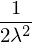

In [6]:
expectxsq

In [7]:
sigma = sp.sqrt(expectxsq - expectx**2)
sigma

### Plotting

The problem asks for a sketch, so as before we have to choose a value for $\lambda$. It's fine to use $\lambda=1$. The wrinkle with this plot is we need to add the extra annotations at $\langle x \rangle \pm \sigma_x$. I'll go a step further and shade the area under the curve between the requested limits.  First, we substitute our chosen value for $\lambda$ in to both $|\Psi^2|$ and $\sigma_x$.

In [8]:
Psisq = (Psi*sp.conjugate(Psi)).subs(lam, 1)

Psisq

In [9]:
sigma_x = sigma.subs(lam, 1)
sigma_x

Next, we use `lambdify` to turn our mathematical expression into a python function, and plot.

In [10]:
function_to_plot = sp.lambdify(x, Psisq, "numpy")

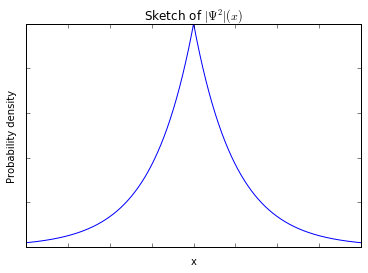

In [11]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

domain = np.arange(-2, 2, 0.001)
plt.plot(domain, function_to_plot(domain))
plt.title(r"Sketch of $|\Psi^2|(x)$")
plt.xlabel("x")
plt.ylabel("Probability density")

# since it's a sketch, numbers on the axes aren't meaningful
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])

That's the plot, but now we need to add the annotations.

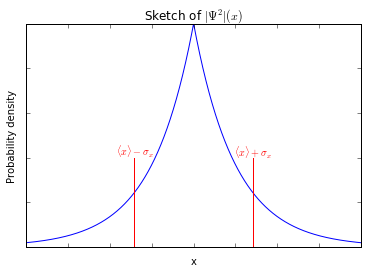

In [12]:
# the basic plot
plt.plot(domain, function_to_plot(domain))
plt.title(r"Sketch of $|\Psi^2|(x)$")
plt.xlabel("x")
plt.ylabel("Probability density")

# since it's a sketch, numbers on the axes aren't meaningful
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])

# add vertical lines for <x>+sigma, <x>-sigma
minus = (expectx - sigma_x).evalf()
plt.plot([minus, minus], [0, 0.4],"r")

plus = (expectx + sigma_x).evalf()
plt.plot([plus, plus], [0, 0.4], "r")

# add text labels for <x>+sigma, <x>-sigma
minus_text = r"$\langle x \rangle - \sigma_x$"
plt.text(minus, 0.41, minus_text, horizontalalignment='center', color="r")

plus_text = r"$\langle x \rangle + \sigma_x$"
txt = plt.text(plus, 0.41, plus_text, horizontalalignment='center', color="r")



If we want to pretty it up with a fill, that requires some additional work.  There are two matplotlib functions, `fill`, and `fill_between`, which do similar things. It turns out that `fill_between` is the one we want here; if we use `fill`, it doesn't fill all the way down to the x-axis. Also, if you're relatively inexperienced with python, line 27 is worth some attention. I use a *list comprehension* to create a list of true/false values, and then turn it into a *numpy array* for use with `fill_between`. Strictly speaking, that latter step isn't necessary, but it's something I like to do anyway.

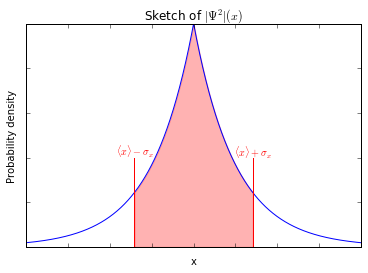

In [13]:
# the basic plot
plt.plot(domain, function_to_plot(domain))
plt.title(r"Sketch of $|\Psi^2|(x)$")
plt.xlabel("x")
plt.ylabel("Probability density")

# since it's a sketch, numbers on the axes aren't meaningful
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])

# add vertical lines for <x>+sigma, <x>-sigma
minus = (expectx - sigma_x).evalf()
plt.plot([minus, minus], [0, 0.4],"r")

plus = (expectx + sigma_x).evalf()
plt.plot([plus, plus], [0, 0.4], "r")

# add text labels for <x>+sigma, <x>-sigma
minus_text = r"$\langle x \rangle - \sigma_x$"
plt.text(minus, 0.41, minus_text, horizontalalignment='center', color="r")

plus_text = r"$\langle x \rangle + \sigma_x$"
txt = plt.text(plus, 0.41, plus_text, horizontalalignment='center', color="r")

# the fill. Semicolon suppresses output
fill_region = np.array([x > minus and x < plus for x in domain])
plt.fill_between(domain, function_to_plot(domain), color="r", alpha=0.3, where=fill_region);

### Probability

The probability of finding the particle between $\langle x \rangle - \sigma_x$ and $\langle x \rangle + \sigma_x$ is just the area of the shaded region, so to calculate it, we integrate $$\int_{\langle x \rangle - \sigma_x}^{\langle x \rangle + \sigma_x} |\Psi^2| dx.$$



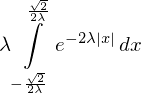

In [14]:
sp.integrate(Psi*sp.conjugate(Psi), (x, expectx-sigma, expectx+sigma))

It turns out that, because of the absolute value, sympy doesn't know how to do this integral. Let's offer some help. We can get rid of the absolute value by breaking the integral in two at $x=0$ and being explicit about the sign of $x$. Since there's symmetry, We can do just the positive side and multiply it by two.

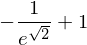

In [15]:
# abs(x) = x if x>0
pos_side = lam*sp.exp(-2*lam*x)

# The negative side is just like the positive, so multiply by 2
2*sp.integrate(pos_side, (x, 0, sigma))

Notice that since the limits of integration depend on $\lambda$, the end result does not. That's nice, because it allows us to say something about probability without worrying about choosing a value for $\lambda$.

We can turn this into a number, too.

In [16]:
(2*sp.integrate(pos_side, (x, 0, sigma))).evalf()

So, there's a 76% probability of finding the particle within $\sigma$ of the central peak, *independent of our choice of $\lambda$*.

----
## Portfolio references
* Problem 1.3

## Index terms
* Wavefunction
* Normalization
* Plotting
* Probability

## Book references

## External references
* [Matplotlib thumbnail gallery](http://matplotlib.org/gallery.html) for some ideas on what kinds of things you can plot, and how.
* To figure out that the `abs` function in `sympy` is actually `Abs`, I looked at the [reference documentation for the Functions module](http://docs.sympy.org/latest/modules/functions/index.html)